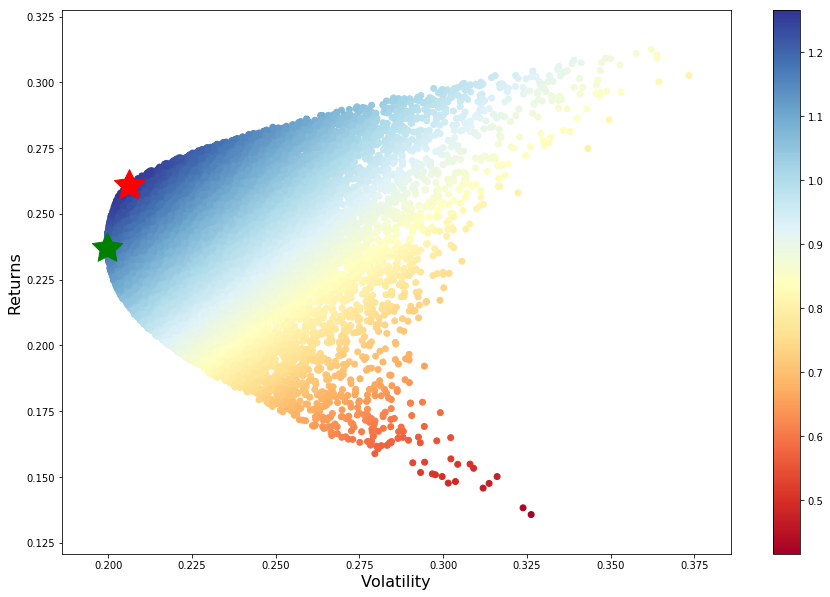

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

#list of stocks in portfolio
stocks = ['BAC','NKE','NVDA','SBUX']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(4))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility', fontsize=16)
plt.ylabel('Returns', fontsize=16)
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)
plt.show()

In [4]:
print(max_sharpe_port)

ret       0.261829
stdev     0.205786
sharpe    1.272337
BAC       0.001329
NKE       0.371830
NVDA      0.167049
SBUX      0.459791
Name: 4819, dtype: float64


In [5]:
print(min_vol_port)

ret       0.238145
stdev     0.199901
sharpe    1.191317
BAC       0.119194
NKE       0.417865
NVDA      0.047076
SBUX      0.415865
Name: 10026, dtype: float64


In [68]:
sharpelist = []
volatility = []
for i in range(7):
    sharpelist.append(max_sharpe_port[i])
    volatility.append(min_vol_port[i])

In [69]:
col = ['ret', 'stdev', 'sharpe', 'BAC', 'NKE', 'NVDA', 'SBUX']

In [82]:
sharpedf = pd.DataFrame(sharpelist, index = col, columns = ['Value'])
volatilitydf = pd.DataFrame(volatility, index = col, columns = ['Value'])
sharpedf = sharpedf.T
volatilitydf = volatilitydf.T
df = sharpedf.append(volatilitydf)

In [83]:
df.index = (['Max Sharpe Ratio', 'Minimum Volatility'])

In [84]:
df = df.T

In [85]:
df = df.drop(['ret', 'stdev', 'sharpe'])

Text(0,0.5,'Weight of Asset in Portfolio')

<Figure size 1080x720 with 0 Axes>

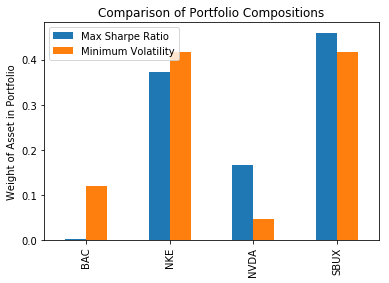

In [86]:
plt.figure(figsize=(15,10))
df.plot.bar(title = 'Comparison of Portfolio Compositions')
plt.ylabel('Weight of Asset in Portfolio')